In [7]:
# 包导入区
from math import cos as cos

from math import pi as pi
import numpy as np
from numpy import random

In [210]:
# 基本参数设置区
nums=1600
wid=40
long=40
# 噪声强度
delta=0.8

In [168]:

 
noise = np.random.normal(0, 1, nums)
 

In [173]:
source=np.arange(nums)*pi/nums*2
source2=source+pi/4
souece3=source+2*pi/4
source4=source+3*pi/4

In [74]:
np.arange(5,size=(2,2))

TypeError: arange() got an unexpected keyword argument 'size'

In [80]:
cc=np.arange(10)
cc.reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [72]:
#np.cos(source)

In [27]:
import matplotlib.pyplot as plt

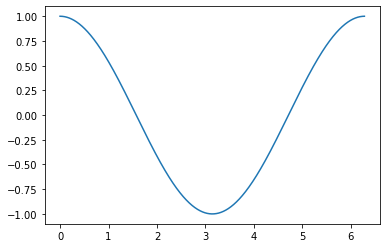

In [174]:
plt.plot(source,np.cos(source))

In [201]:
testdata=np.cos(source).reshape(1,1,wid,long)


In [176]:
x=np.arange(nums)


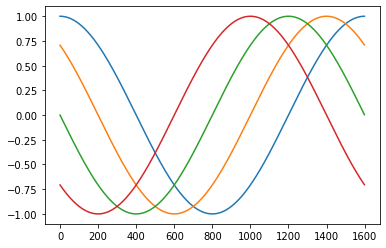

In [202]:
# 比如说真实的曲线如下
plt.plot(x,np.cos(source))
plt.plot(x,np.cos(source+pi/4))
plt.plot(x,np.cos(source+2*pi/4))
plt.plot(x,np.cos(source+3*pi/4))

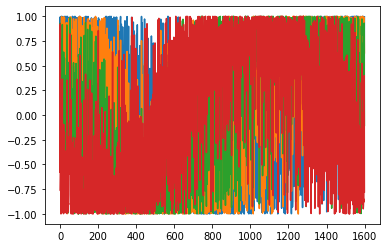

In [211]:
plt.plot(x,np.cos(source+delta*noise))
plt.plot(x,np.cos(source+pi/4+delta*noise))
plt.plot(x,np.cos(source+delta*noise+2*pi/4))
plt.plot(x,np.cos(source+delta*noise+3*pi/4))

In [76]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
import os
num_epochs = 100
batch_size = 128
learning_rate = 1e-3

In [182]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            ## （40-3+1+1）/3+1=14 
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            ##  16，7
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            # （7-3+1+1）/2+1=4
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            
            nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
            
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=1e-5)


In [ ]:
# 训练过程

for epoch in range(10000):
    for k in range(4):
        testdata=np.cos(source+pi*k/4).reshape(1,1,wid,long)
        img=torch.Tensor(testdata)
        total_loss = 0
   
        img = Variable(img).cuda()
        # ===================forward=====================
        output = model(img)
        print(output.shape)
        print(img.shape)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    # ===================log========================
        if epoch %100==0:
            print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, total_loss))
    




In [218]:
testdata2=np.cos(source+delta*noise).reshape(1,1,wid,long)
img2=torch.Tensor(testdata2)
img2 = Variable(img2).cuda()
output2 = model(img2)

In [219]:
testdata3=np.cos(source+pi/2+delta*noise).reshape(1,1,wid,long)
img3=torch.Tensor(testdata3)
img3 = Variable(img3).cuda()
output3 = model(img3)

In [220]:
testdata4=np.cos(source+pi/4+delta*noise).reshape(1,1,wid,long)
img4=torch.Tensor(testdata4)
img4 = Variable(img4).cuda()
output4 = model(img4)

In [232]:
testdata5=np.cos(source+3*pi/4+delta*noise).reshape(1,1,wid,long)
img5=torch.Tensor(testdata5)
img5 = Variable(img5).cuda()
output5 = model(img5)

Text(0.5, 1.0, 'Recover')

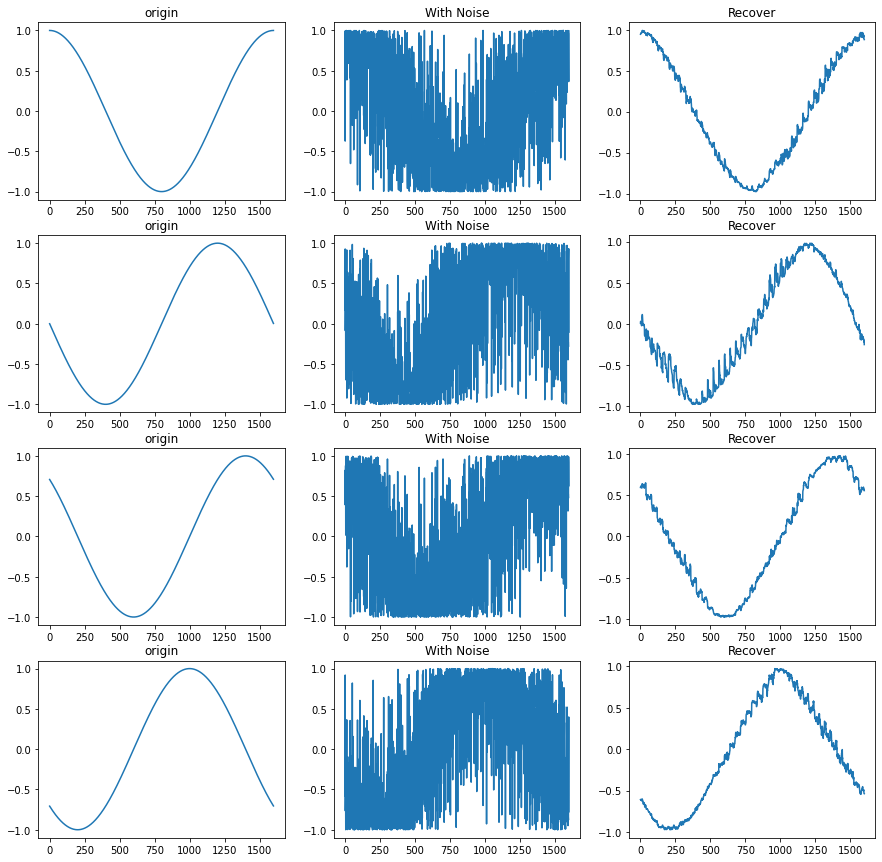

In [233]:
plt.figure(figsize=(15, 15))
plt.subplot(431)
plt.plot(np.cos(source))
plt.title('origin')
plt.subplot(432)
plt.plot(np.cos(source+delta*noise))
plt.title('With Noise')
plt.subplot(433)
plt.plot(x,output2.reshape(nums).cpu().detach().numpy())
plt.title('Recover')
plt.subplot(434)
plt.plot(x,np.cos(source+pi/2))
plt.title('origin')
plt.subplot(435)
plt.plot(x,np.cos(source+pi/2+delta*noise))
plt.title('With Noise')
plt.subplot(436)
plt.plot(x,output3.reshape(nums).cpu().detach().numpy())
plt.title('Recover')
plt.subplot(437)
plt.plot(x,np.cos(source+pi/4))
plt.title('origin')
plt.subplot(438)
plt.plot(x,np.cos(source+pi/4+delta*noise))
plt.title('With Noise')
plt.subplot(439)
plt.plot(x,output4.reshape(nums).cpu().detach().numpy())
plt.title('Recover')
plt.subplot(4,3,10)
plt.plot(x,np.cos(source+3*pi/4))
plt.title('origin')
plt.subplot(4,3,11)
plt.plot(x,np.cos(source+3*pi/4+delta*noise))
plt.title('With Noise')
plt.subplot(4,3,12)
plt.plot(x,output5.reshape(nums).cpu().detach().numpy())
plt.title('Recover')

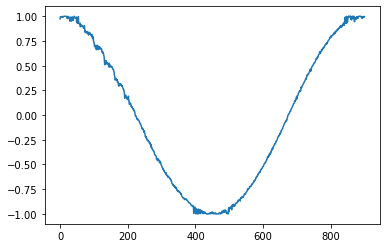

In [127]:
plt.plot(x,output2.reshape(900).cpu().detach().numpy())

In [227]:
# 分类神经网络
class CNN(nn.Module):

    def __init__(self):

        # 调用父类的构造函数
        super(CNN, self).__init__()
        # 第一层卷积池化， Sequential内的函数顺序执行
        # 原文中激活函数都是用的sigmoid，这里使用更好的ReLu
        self.conv_pool1 = nn.Sequential(
            nn.Conv2d(in_channels=1,        # input (1, 28, 28) padding to(1,32,32)
                                            # 这里的input和output的值都是针对一个样本来说的，而训练时是一次输入一个batch
                      out_channels=6,
                      kernel_size=(5, 5),
                      padding=2),           # output(6, 28, 28)
            nn.ReLU(),                      # 激活函数
            nn.MaxPool2d(2, stride=2)                 # output(6, 14, 14)
        )

        self.conv_pool2 = nn.Sequential(
            nn.Conv2d(in_channels=6,
                      out_channels=16,
                      kernel_size=(5, 5)
                      ),                            # output(16, 10, 10)
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)             # output(16, 5, 5)
        )

        # 全连接层
        self.fc1 = nn.Sequential(                   # 这里用全连接层代替原文的卷积层
            nn.Linear(16*5*5, 120),
            nn.ReLU()
        )

        # 全连接层
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        # 输出层
        self.out = nn.Sequential(
            nn.Linear(84, 10),

        )

    # 前向传播
    def forward(self, x):

        x = self.conv_pool1(x)
        x = self.conv_pool2(x)
        x = x.view(x.size(0), -1)       # resize to 2-dims(batch_size, 16*5*5) 展平成1维
        print(x.shape)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x



In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision


class CNN(nn.Module):

    def __init__(self):

        # 调用父类的构造函数
        super(CNN, self).__init__()
        # 第一层卷积池化， Sequential内的函数顺序执行
        # 原文中激活函数都是用的sigmoid，这里使用更好的ReLu
        self.conv_pool1 = nn.Sequential(
            nn.Conv2d(in_channels=1,        # input (1, 28, 28) padding to(1,32,32)
                                            # 这里的input和output的值都是针对一个样本来说的，而训练时是一次输入一个batch
                      out_channels=6,
                      kernel_size=(5, 5),
                      padding=2),           # output(6, 28, 28)
            nn.ReLU(),                      # 激活函数
            nn.MaxPool2d(2, stride=2)                 # output(6, 14, 14)
        )

        self.conv_pool2 = nn.Sequential(
            nn.Conv2d(in_channels=6,
                      out_channels=16,
                      kernel_size=(5, 5)
                      ),                            # output(16, 10, 10)
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2)             # output(16, 5, 5)
        )

        # 全连接层
        self.fc1 = nn.Sequential(                   # 这里用全连接层代替原文的卷积层
            nn.Linear(16*5*5, 120),
            nn.ReLU()
        )

        # 全连接层
        self.fc2 = nn.Sequential(
            nn.Linear(120, 84),
            nn.ReLU()
        )
        # 输出层
        self.out = nn.Sequential(
            nn.Linear(84, 10),

        )

    # 前向传播
    def forward(self, x):

        x = self.conv_pool1(x)
        x = self.conv_pool2(x)
        x = x.view(x.size(0), -1)       # resize to 2-dims(batch_size, 16*5*5) 展平成1维
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        return x


# 加载数据
def data_loader(batch_size):

    # 将数据类型转换成tensor的函数
    transform = torchvision.transforms.ToTensor()

    train_set = torchvision.datasets.MNIST(root='minist', train=True, transform=transform, download=False)
    train_loaders = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=2)

    test_set = torchvision.datasets.MNIST(root='minist', train=False, transform=transform, download=False)
    test_loaders = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False, num_workers=2)

    return train_loaders, test_loaders


def train(model, learn_rate, train_loaders, epoch):

    # 优化器
    optimizer = torch.optim.Adam(model.parameters(), learn_rate)
    # 损失函数
    loss_fun = nn.CrossEntropyLoss()
    

    for i in range(epoch):
    	running_loss = 0.0
        for j, (x, y) in enumerate(train_loaders):

            x = Variable(x, requires_grad=True)     # x是一个batch_size个的样本
            y = Variable(y)
            optimizer.zero_grad()                   # 将前一次的梯度清0
            out = model(x)                          # 前向传播
            loss = loss_fun(out, y)                 # 计算误差
            loss.backward()                         # 反向传播计算梯度
            optimizer.step()                        # 更新参数

            running_loss += loss
            # print(loss[0])
            if (j+1) % 200 == 0:  # print every 200 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (i + 1, j + 1, running_loss/200))
                running_loss = 0.0

    torch.save(model.state_dict(), 'model/model.pth')
    print("Finished training")


def test(model, test_loaders):

    correct = 0
    total = 0

    for datas in test_loaders:
        images, labels = datas

        images = Variable(images)

        outputs = model(images)
        # predicted = torch.max(outputs, 1)[1].data.numpy().squeeze()
        predicted = torch.max(outputs.data, 1)[1]
        total += labels.size(0)
        correct += (predicted == labels).sum()

    # print(total, correct)
    print('Accuracy of the network on the 10000 test images: %.2f %%' % (
            100 * correct / total))

if __name__ == '__main__':

    cnn = CNN()
    # 加载模型
    # path = 'model/model.pth'
    # cnn.load_state_dict(torch.load(path))
    # print(cnn)
    batch_size = 32
    learn_rate = 0.001
    epoch = 1
    train_loader, test_loader = data_loader(batch_size)
    train(cnn, learn_rate, train_loader, epoch)
    test(cnn, test_loader)


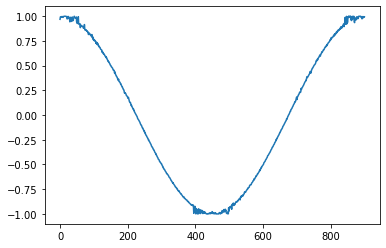

In [124]:
#output.reshape(1,900)
plt.plot(x,output.reshape(900).cpu().detach().numpy())

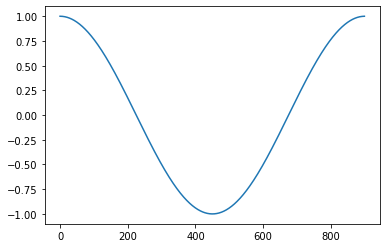

In [117]:
plt.plot(x,np.cos(source))

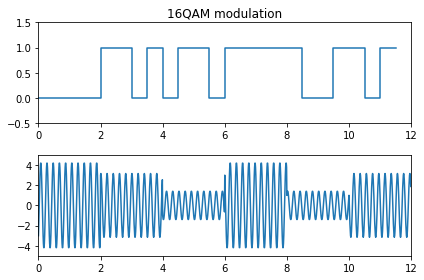

In [41]:
import numpy as np
import matplotlib.pyplot as plt

bitsToAmp = {'11': 3, '10': 1, '01': -1, '00': -3}  # 设置数字和幅度的对应关系
spots = {}  # 放置点

for i in ['0', '1']:
    for j in ['0', '1']:
        for k in ['0', '1']:
            for p in ['0', '1']:
                strs = ''.join([i, j, k, p])  # 通过循环获得16个4位数的10组合
                str1 = ''.join([i, j])  # 前两个10组合
                a = bitsToAmp[str1]  # 获取前两个10组合对应的幅值
                a = int(a)

                str2 = ''.join([k, p])
                b = bitsToAmp[str2]
                b = int(b)  # 获取后两个10组合对应的幅值

                complexSpot = complex(a, b)  # 不能写为a+bj，因为编译不通过 生成坐标

                tempSpot = {strs: complexSpot}  # 获得数字组合和点
                spots.update(tempSpot)  # 存入点的集合

fig = plt.figure()
t = np.arange(0, 12.0, 0.5)  # 设置基带信号10的坐标轴，每隔0.5的距离绘制一个基带的二进制信号，一共16个比特

# input
plt.subplot(2, 1, 1)
y1 = [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1]
plt.plot(t, y1, drawstyle='steps-post')  # 将16个比特每隔0.5绘制到坐标系上
plt.xlim(0, 12)
plt.ylim(-0.5, 1.5)
plt.title('16QAM modulation')

# 串并变换
l4 = int(len(y1) / 4)  # 获取比特流的长度除以4，4个比特为一组，则共有多少组
a = np.asarray(y1)  # 将基带信号转换为numpy格式
y2 = a.reshape(l4, 4)  # 将一维数组转置为二维数组，每一行中有4个比特的数据

plt.subplot(2, 1, 2)
t = np.arange(0, 12., 0.01)  # 横坐标的数据列表，每个0.01绘制一个点
rectwav = []  # 用来存储纵坐标值的列表

# i表示第i个线段，每个线段对应一个二进制的四位组合s0s1s2s3。每个线段的长度为2，是基带信号每个信号长度0.5的四倍
for i in range(l4):
    b = y2[i]  # 取出第i组四位数组合s0s1s2s3
    str4Bits = str(b).strip('[').strip(']').replace(' ', '')  # 将列表中的4个比特转换为字符串并且去掉[ ] 和空格
    complexWave = spots[str4Bits]  # 根据四个比特的字符串对应到字典中的复数，得到横坐标和纵坐标的幅度，I Q的幅度值
    xWave = complexWave.real  # 取出横坐标的值
    yWave = complexWave.imag  # 取出纵坐标的值

    # 在t数组中第i段横坐标的点数，此处每个段的波形长度应该是0.5的4倍，也就是2
    t_tmp = t[(i * 200):((i + 1) * 200)]
    xI_tmp = xWave * np.ones(200)  # 200个横坐标的幅度值
    yQ_tmp = yWave * np.ones(200)  # 200个纵坐标的幅度值
    # 将幅度分别与两个正交载波相乘求和
    wav_tmp = xI_tmp * np.cos(2 * np.pi * 5 * t_tmp) - yQ_tmp * np.sin(2 * np.pi * 5 * t_tmp)
    rectwav.append(wav_tmp)  # 将调制后的点加到总的波形列表中

# 绘制调制后的波形
plt.plot(t, np.array(rectwav).flatten())
plt.xlim(0, 12)
plt.ylim(-5, 5)

plt.tight_layout()
plt.show()


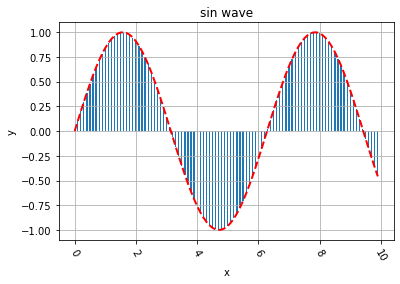

In [47]:
import math
from matplotlib import pyplot as plt

# Bar

x=np.arange(0,10,0.1)

y=np.sin(x)

plt.bar(x,y,width=0.04,linewidth=0.2)

plt.plot(x,y,'r--',linewidth=2)

plt.title('sin wave')

plt.xticks(rotation=-60)

plt.xlabel('x')

plt.ylabel('y')

plt.grid(True)

plt.show()